In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
melb_data = pd.read_csv("/Users/both/Desktop/Data science project/Real_estate/dataset/Property Sales of Melbourne City.csv")
melb_data.head(5)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
melb_data.shape

(18396, 22)

In [5]:
melb_data.count()

Unnamed: 0       18396
Suburb           18396
Address          18396
Rooms            18396
Type             18396
Price            18396
Method           18396
SellerG          18396
Date             18396
Distance         18395
Postcode         18395
Bedroom2         14927
Bathroom         14925
Car              14820
Landsize         13603
BuildingArea      7762
YearBuilt         8958
CouncilArea      12233
Lattitude        15064
Longtitude       15064
Regionname       18395
Propertycount    18395
dtype: int64

In [6]:
#Check null
melb_data.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [7]:
#Drop unused columns on building area, CouncilArea, RegionName, Propertycount
melb_data.drop(['BuildingArea','CouncilArea','Regionname','Propertycount'],axis=1,inplace=True) 


Check distribution of BuildingArea

In [8]:
melb_data.YearBuilt.describe()

count    8958.000000
mean     1965.879996
std        37.013261
min      1196.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: YearBuilt, dtype: float64

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 1.400e+01, 9.700e+01,
        6.290e+02, 3.690e+02, 7.790e+02, 9.660e+02, 1.221e+03, 1.855e+03,
        1.125e+03, 1.897e+03]),
 array([1196.  , 1212.44, 1228.88, 1245.32, 1261.76, 1278.2 , 1294.64,
        1311.08, 1327.52, 1343.96, 1360.4 , 1376.84, 1393.28, 1409.72,
        1426.16, 1442.6 , 1459.04, 1475.48, 1491.92, 1508.36, 1524.8 ,
        1541.24, 1557.68, 1574.12, 1590.56, 1607.  , 1623.44, 1639.88,
        1656.32, 1672.76, 1689.2 , 1705.64, 1722.08, 1738.52, 1754.96,
        1771.4 , 1787

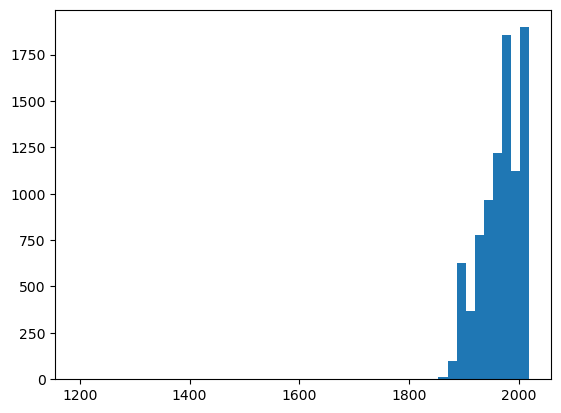

In [9]:
plt.hist(melb_data.YearBuilt,bins=50)

In [10]:
#Calculate outlier of yearbuilt
# calculate the interquartile range (IQR) for Yearbuilt
q1 = melb_data.YearBuilt.quantile(0.25)
q3 = melb_data.YearBuilt.quantile(0.75)
iqr = q3 - q1

# define the threshold for outliers
threshold = 1.5

yearBuild_outlier = ((melb_data.YearBuilt < (q1 - threshold * iqr)) | (melb_data.YearBuilt > (q3 + threshold * iqr)))
    

In [11]:
melb_data = melb_data.loc[~yearBuild_outlier]

(array([  4.,  79.,   0.,  13.,  15., 246.,   6.,   2., 357.,   5.,  31.,
          6., 254.,  68.,   4., 293.,   8., 107.,  24., 289.,  62.,   8.,
        269.,   9.,  36.,  23., 621., 113.,  18., 803.,  27., 209.,  64.,
        986., 268.,  31., 406.,  27., 140.,  44., 228., 188., 109., 467.,
        225., 371., 379., 567., 344.,  84.]),
 array([1875.  , 1877.86, 1880.72, 1883.58, 1886.44, 1889.3 , 1892.16,
        1895.02, 1897.88, 1900.74, 1903.6 , 1906.46, 1909.32, 1912.18,
        1915.04, 1917.9 , 1920.76, 1923.62, 1926.48, 1929.34, 1932.2 ,
        1935.06, 1937.92, 1940.78, 1943.64, 1946.5 , 1949.36, 1952.22,
        1955.08, 1957.94, 1960.8 , 1963.66, 1966.52, 1969.38, 1972.24,
        1975.1 , 1977.96, 1980.82, 1983.68, 1986.54, 1989.4 , 1992.26,
        1995.12, 1997.98, 2000.84, 2003.7 , 2006.56, 2009.42, 2012.28,
        2015.14, 2018.  ]),
 <BarContainer object of 50 artists>)

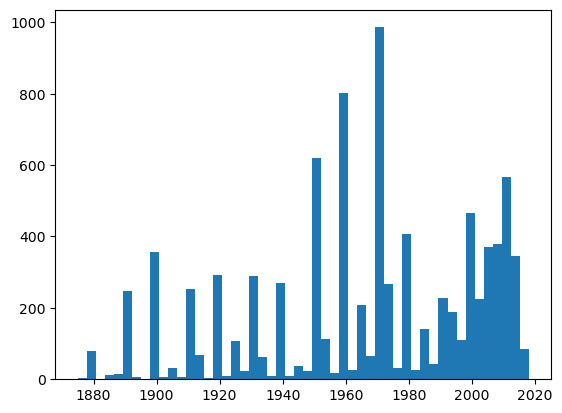

In [12]:
plt.hist(melb_data.YearBuilt,bins=50)

In [13]:
melb_data.YearBuilt.describe()

count    8937.000000
mean     1966.206669
std        35.787076
min      1875.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [14]:
melb_data.YearBuilt.fillna(int(melb_data.YearBuilt.mean()),inplace=True)

In [15]:
melb_data.shape

(18375, 18)

In [16]:
# Handle na problem to either fill na or drop na
# Drop na for distance ,Bathroom and Landsize
melb_data.dropna(subset=['Distance','Landsize','Bathroom'],inplace=True)

In [17]:
#Treat car park as zero to fill na 
melb_data['Car'].fillna(0,inplace=True)

In [18]:
melb_data[melb_data['Lattitude'].isnull()==True]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude
2019,2572,Burwood,23 Monica St,3,h,990000,VB,Fletchers,17/09/2016,11.7,3125.0,3.0,2.0,2.0,263.0,1966.0,NaN,NaN
2507,3257,Clifton Hill,3/268 Alexandra Pde E,1,u,363000,S,hockingstuart,27/06/2016,3.4,3068.0,1.0,1.0,1.0,0.0,1966.0,NaN,NaN
3461,4485,Footscray,483 Barkly St,3,t,781000,S,Jas,27/11/2016,6.4,3011.0,3.0,2.0,2.0,98.0,2015.0,NaN,NaN
3987,5170,Hampton East,7 Seafoam St,4,t,1185000,S,RT,28/05/2016,14.5,3188.0,4.0,3.0,1.0,300.0,1966.0,NaN,NaN
8371,10745,Williamstown North,4/9 Adeline St,1,u,355000,S,Sweeney,27/11/2016,8.9,3016.0,1.0,1.0,1.0,46.0,1966.0,NaN,NaN
10269,13223,Melbourne,1913/228 Abeckett St,3,u,1175000,PI,Icon,29/04/2017,2.8,3000.0,3.0,3.0,2.0,0.0,1966.0,NaN,NaN
10902,14008,Brooklyn,9 Richards Ct,3,h,750000,S,hockingstuart,20/05/2017,10.9,3012.0,3.0,1.0,2.0,667.0,1966.0,NaN,NaN
10996,14132,North Melbourne,13/201 Abbotsford St,2,t,755000,PI,Nelson,29/04/2017,2.3,3051.0,2.0,1.0,1.0,1537.0,1890.0,NaN,NaN
11003,14139,Oakleigh South,4 Druitt St,4,h,1205500,S,Woodards,22/04/2017,14.7,3167.0,4.0,2.0,2.0,553.0,1966.0,NaN,NaN
11005,14142,Oakleigh South,298 Warrigal Rd,3,h,799999,S,Woodards,29/04/2017,14.7,3167.0,3.0,2.0,4.0,590.0,1960.0,NaN,NaN


In [19]:
melb_data['Suburb'].value_counts()

Reservoir         359
Richmond          259
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Attwood             1
Upwey               1
Bacchus Marsh       1
Monbulk             1
Healesville         1
Name: Suburb, Length: 315, dtype: int64

In [20]:
#Fill na 'Lattitude','Longtitude' using average
melb_data[['Lattitude','Longtitude']] = melb_data.groupby('Suburb')[['Lattitude', 'Longtitude']].transform(lambda x: x.fillna(x.mean())).loc[:, ['Lattitude','Longtitude']]


In [21]:
#Check null
melb_data.isnull().sum()

Unnamed: 0    0
Suburb        0
Address       0
Rooms         0
Type          0
Price         0
Method        0
SellerG       0
Date          0
Distance      0
Postcode      0
Bedroom2      0
Bathroom      0
Car           0
Landsize      0
YearBuilt     0
Lattitude     1
Longtitude    1
dtype: int64

In [22]:
# Drop na for Lattitude
melb_data.dropna(subset=['Lattitude'],inplace=True)

In [23]:
melb_data.shape

(13581, 18)

In [24]:
melb_data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude
count,13581.000000,13581.000000,1.358100e+04,13581.000000,13581.000000,13581.000000,13581.000000,13581.000000,13581.000000,13581.000000,13581.000000,13581.000000
mean,11194.577572,2.937854,1.073760e+06,10.149444,3105.269273,2.914513,1.534202,1.603417,558.321847,1965.424416,-37.809183,144.995231
std,6473.088149,0.956320,6.355651e+05,5.869536,90.840499,0.966362,0.691275,0.965838,3990.467649,27.952526,0.079338,0.103989
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1875.000000,-38.182550,144.431810
25%,5596.000000,2.000000,6.500000e+05,6.200000,3044.000000,2.000000,1.000000,1.000000,177.000000,1960.000000,-37.856870,144.929270
50%,11091.000000,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,441.000000,1966.000000,-37.802300,145.000150
75%,16780.000000,3.000000,1.328000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,1975.000000,-37.756400,145.058500
max,23545.000000,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,2018.000000,-37.408530,145.526350


In [25]:
melb_data = melb_data[melb_data.Landsize != 0]
melb_data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude
count,11642.000000,11642.000000,1.164200e+04,11642.000000,11642.000000,11642.000000,11642.000000,11642.000000,11642.000000,11642.000000,11642.000000,11642.000000
mean,11559.300120,3.099038,1.145374e+06,10.776800,3104.758117,3.072067,1.584006,1.683216,651.311544,1963.915994,-37.806563,144.996498
std,6610.005765,0.895388,6.435673e+05,5.944195,94.616109,0.911539,0.706489,0.996157,4302.980096,28.442434,0.082876,0.110066
min,1.000000,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1875.000000,-38.182550,144.431810
25%,5753.250000,3.000000,7.140000e+05,6.900000,3044.000000,3.000000,1.000000,1.000000,270.000000,1960.000000,-37.856765,144.924000
50%,11764.500000,3.000000,9.715000e+05,10.200000,3083.000000,3.000000,1.000000,2.000000,533.000000,1966.000000,-37.796300,145.003475
75%,17273.750000,4.000000,1.400000e+06,13.500000,3147.000000,4.000000,2.000000,2.000000,676.000000,1970.000000,-37.750100,145.066798
max,23545.000000,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,2018.000000,-37.408530,145.526350


Feature engineering

In [26]:
#Transform price to be price_per_sqm
melb_data['price_per_sqm'] = melb_data['Price']/melb_data['Landsize']

In [27]:
# Featuring suburb to reduce the dimensions
agg_suburb = melb_data.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending=False)
agg_suburb

Suburb
Reservoir             337
Bentleigh East        240
Preston               230
Richmond              195
Brunswick             187
                     ... 
Brookfield              1
Rockbank                1
Wallan                  1
Beaconsfield Upper      1
Bullengarook            1
Name: Suburb, Length: 312, dtype: int64

In [28]:
agg_suburb.describe()

count    312.000000
mean      37.314103
std       46.860511
min        1.000000
25%        6.000000
50%       18.000000
75%       50.250000
max      337.000000
Name: Suburb, dtype: float64

In [29]:
sub_less_than_10 = agg_suburb[agg_suburb<10]
sub_less_than_10

Suburb
Carrum                9
Brooklyn              9
East Melbourne        9
Mernda                9
Keilor                9
                     ..
Brookfield            1
Rockbank              1
Wallan                1
Beaconsfield Upper    1
Bullengarook          1
Name: Suburb, Length: 104, dtype: int64

In [30]:
melb_data.Suburb = melb_data.Suburb.apply(lambda x: "other" if x in sub_less_than_10 else x)

In [31]:
len(melb_data.Suburb.unique())

209

Evaluate outlier price/m^2

In [32]:
melb_data.price_per_sqm.describe()

count     11642.000000
mean       3356.886465
std       10060.504236
min           6.235364
25%        1386.324354
50%        2361.897740
75%        3959.196593
max      710000.000000
Name: price_per_sqm, dtype: float64

In [33]:
# group by suburbs
grouped = melb_data.groupby('Suburb')

# calculate the median price per square meter for each suburb
median_price = grouped['price_per_sqm'].median()

# calculate the interquartile range (IQR) for each suburb's price per square meter
q1 = grouped['price_per_sqm'].quantile(0.25)
q3 = grouped['price_per_sqm'].quantile(0.75)
iqr = q3 - q1

# define the threshold for outliers
threshold = 1.5

# remove data points for each suburb that fall outside the defined threshold
filtered_data = pd.DataFrame()
for suburb in grouped.groups:
    is_outlier = ((melb_data['Suburb'] == suburb) & ((melb_data['price_per_sqm'] < (q1[suburb] - threshold * iqr[suburb])) | (melb_data['price_per_sqm'] > (q3[suburb] + threshold * iqr[suburb]))))
    melb_data['is_outlier'] = is_outlier
    #filtered_data = pd.concat([filtered_data, melb_data.loc[~is_outlier]])


In [34]:
melb_data = melb_data.loc[~is_outlier]

In [35]:
melb_data.shape

(11599, 20)

In [36]:
melb_data.head(5)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,price_per_sqm,is_outlier
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,1966.0,-37.7996,144.9984,7326.732673,False
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,-37.8079,144.9934,6634.615385,False
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,-37.8093,144.9944,10932.835821,False
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,1966.0,-37.7969,144.9969,9042.553191,False
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,-37.8072,144.9941,13333.333333,False


In [37]:
#Transform dataset to be the training data
train_cols = ['Suburb','Rooms','Type','Price','Method','Distance','Bedroom2','Bathroom','Car',
               'Landsize','SellerG','YearBuilt']
final_dataset  = melb_data[train_cols]
final_dataset.shape

(11599, 12)

In [38]:
#One hot code 
dataset = pd.get_dummies(final_dataset, drop_first = True)
dataset.head(5)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Suburb_Aberfeldie,Suburb_Airport West,...,SellerG_Woodards,SellerG_Xynergy,SellerG_YPA,SellerG_Zahn,SellerG_buyMyplace,SellerG_hockingstuart,SellerG_hockingstuart/Barry,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK
0,2,1480000,2.5,2.0,1.0,1.0,202.0,1966.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1035000,2.5,2.0,1.0,0.0,156.0,1900.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1465000,2.5,3.0,2.0,0.0,134.0,1900.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,850000,2.5,3.0,2.0,1.0,94.0,1966.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1600000,2.5,3.0,1.0,2.0,120.0,2014.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
dataset.drop('Suburb_other',axis='columns',inplace=True)

In [40]:
dataset.shape

(11599, 473)

In [41]:
X = dataset.drop('Price', axis = 1)
y = dataset['Price']

Train ML models 
1. Linear regression
2. Lasso regularization 
3. Ridge regularization

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [44]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)


LinearRegression()

In [45]:
#Test the result on test data
linear_reg.score(X_test,y_test)

0.654864724035313

Using K-Fold Cross validation to evaluate the accurary of linear regression model

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.65509746, 0.66494953, 0.66958631, 0.64625814, 0.68578398])

In [47]:
#Lasso regularization
from sklearn import linear_model
from sklearn.linear_model import Lasso
lasso_reg = linear_model.Lasso(alpha = 100, max_iter = 100, tol = 0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=100, max_iter=100, tol=0.1)

In [48]:
lasso_reg.score(X_test,y_test)

0.6590653915832525

In [49]:
#Ridge regularization
from sklearn.linear_model import Ridge
ridge_reg = linear_model.Ridge(alpha = 50, max_iter= 100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [50]:
ridge_reg.score(X_test,y_test)

0.6271964571641468

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 500]
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 500]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.664335,{'fit_intercept': True}
1,lasso,0.665818,"{'alpha': 100, 'max_iter': 100}"
2,ridge,0.668697,"{'alpha': 1, 'max_iter': 100}"


In [53]:
# Create a new Ridge regression model with the best hyperparameters and fit it to the data
ridge_best = linear_model.Ridge(alpha = 10, max_iter= 100)
ridge_best.fit(X_train, y_train)
# Print the R-squared value of the model
print('R-squared:', ridge_best.score(X, y))

R-squared: 0.6782189888590584


In [54]:
X_train.head(5)

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albert Park,...,SellerG_Woodards,SellerG_Xynergy,SellerG_YPA,SellerG_Zahn,SellerG_buyMyplace,SellerG_hockingstuart,SellerG_hockingstuart/Barry,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK
3860,5,13.7,5.0,2.0,2.0,434.0,1966.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7680,2,13.3,2.0,1.0,4.0,343.0,1960.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14591,3,23.5,3.0,2.0,1.0,721.0,1984.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7708,3,13.3,3.0,1.0,1.0,602.0,1966.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
624,3,10.5,3.0,1.0,2.0,322.0,1966.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Define predict function

In [55]:
def predict_price(suburb,seller,distance,rooms,bedroom,bathroom,car,landsize,YearBuilt):    
    sub_index = np.where(X.columns==("Suburb_"+suburb))[0][0]
    seller_index = np.where(X.columns==("SellerG_"+seller))[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = rooms
    x[2] = bedroom
    x[3] = bathroom
    x[4] = car
    x[5] = landsize
    x[6] = YearBuilt
    if sub_index >= 0:
        x[sub_index] = 1
    if seller_index >= 0:
        x[seller_index] = 1
        
    return ridge_best.predict([x])[0]

Test predict function

In [56]:
#predict_price(suburb,seller,rooms,distance,bedroom,bathroom,car,landsize)
predict_price('Flemington','Dingle',1, 1,1,1,0,20,1920)

796883.5985016292

Export ML script and Features columns 

In [57]:
import pickle
with open('Melb_home_prices_model.pickle','wb') as f:
    pickle.dump(ridge_best,f)

In [58]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))